In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### imports

In [2]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Automatically created module for IPython interactive environment


### utilities

In [3]:
def sigmoid(x):
    return 1 / (1 + (np.e**-x))

def infer_topic(doc_vector, topic_word_distr):
    doc_topic_word_distr = topic_word_distr.copy()
    doc_word_freq_norm = (doc_vector > 0).astype(int)
#     doc_word_freq_norm = doc_vector / doc_vector.sum() if doc_vector.sum() else 0

    for label_class in label_classes:
        doc_topic_word_distr[label_class] *= doc_word_freq_norm
    
    
    doc_topic = np.max(doc_topic_word_distr).idxmax()
    return doc_topic_word_distr, doc_topic

### load dataset

In [23]:
# total number of samples needed
datasize = 3000

# retrieve dataset
docs = fetch_20newsgroups(subset='train', shuffle=False, remove=('headers', 'footers', 'quotes'))
docs, old_labels, classes = docs.data[:datasize], docs.target[:datasize], docs.target_names

In [24]:
# the actual labels as np array
old_labels = np.array(old_labels)
labels = np.zeros(old_labels.shape, dtype=int)

# the new classes
label_classes = list(set([x.split('.')[0] for x in classes]))

# restructuring classes  from 19 to less
for label, cl in enumerate(classes):
    labels[old_labels == label] = label_classes.index(cl.split('.')[0])

In [25]:
print(f"there are {len(docs)} docs and {len(label_classes)} classes: {label_classes}")

there are 3000 docs and 7 classes: ['soc', 'rec', 'talk', 'alt', 'comp', 'misc', 'sci']


### clean dataset

In [26]:
# clean out the new line characters from text in docs
def clean_doc(doc):
    ''' remove unwanter characters line new line '''

    unwanted_chrs = [')', '(', '{', '}', '\t', '\n', '\r', "'", '"', "!"]
    doc = doc.lower()
    for unwanted_chr in unwanted_chrs:
        doc = doc.replace(unwanted_chr, ' ')

    return doc.strip()

clean_docs = [clean_doc(doc) for doc in docs]
clean_docs[0]

'morgan and guzman will have era s 1 run higher than last year, and  the cubs will be idiots and not pitch harkey as much as hibbard.  castillo won t be good  i think he s a stud pitcher'

### count words

In [27]:
# initialize the count vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer = TfidfVectorizer()

# fit it to dataset
train_docs, test_docs, train_labels, test_labels = train_test_split(clean_docs, labels, test_size=.33, random_state=42)
count_vectorizer.fit(train_docs)
vocabulary = count_vectorizer.get_feature_names()

print("word_count is", len(vocabulary))

word_count is 31192


### Prepare Datatset

In [28]:
# create doc count vectors
train_doc_vectors = count_vectorizer.transform(train_docs).toarray()
# train_doc_vectors = normalize(train_doc_vectors, norm="l1", axis=1)
# train_doc_vectors = normalize(train_doc_vectors, norm="l1", axis=0)

test_doc_vectors = count_vectorizer.transform(test_docs).toarray()
# test_doc_vectors = normalize(test_doc_vectors, norm="l1", axis=1)
# test_doc_vectors = normalize(test_doc_vectors, norm="l1", axis=0)

print(f"{len(train_labels)} train_docs, {len(test_labels)} test docs")

2010 train_docs, 990 test docs


In [29]:
document_word_frequency = pd.DataFrame(train_doc_vectors, columns=count_vectorizer.get_feature_names())
document_word_binary_frequency = (document_word_frequency > 0).astype('int')

document_word_frequency["__labels__"] = train_labels
document_word_binary_frequency["__labels__"] = train_labels

print("document_word_frequency shape is", document_word_frequency.shape)

document_word_frequency shape is (2010, 31193)


In [30]:
print(f"there are {len(clean_docs)} docs and {len(label_classes)} classes")

there are 3000 docs and 7 classes


In [31]:
document_word_frequency.head()

,00,000,00000000,00000000b,00000001,00000001b,00000010,00000010b,00000011,00000011b,...,zupancic,zurbrin,zurich,zvb,zx,zygot,zymmr,zyxel1496b,zzzzzz,__labels__
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [32]:
document_word_binary_frequency.head()

,00,000,00000000,00000000b,00000001,00000001b,00000010,00000010b,00000011,00000011b,...,zupancic,zurbrin,zurich,zvb,zx,zygot,zymmr,zyxel1496b,zzzzzz,__labels__
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Prepare Binary Dataset

In [33]:
#reduce freq in doc to bin value of 1 or 0
word_doc_binary_freqency = document_word_binary_frequency.drop(["__labels__"], axis='columns')
# word_doc_binary_freqency = document_word_frequency.drop(["__labels__"], axis='columns')

#the sum vertically of bin freq
word_doc_frequency = word_doc_binary_freqency.sum(0) 

### Topic and word corelation

In [34]:
topic_word_distr = pd.DataFrame(data=0.0, columns=label_classes, index=vocabulary)

for topic, label in enumerate(label_classes):
    word_topic_frequency = word_doc_binary_freqency[document_word_frequency['__labels__'] == topic].sum(0)
    trust_factor = sigmoid(word_doc_frequency)
    
    topic_word_distr[label] = ((word_topic_frequency * trust_factor) / word_doc_frequency).fillna(0)
    
print(f"topic_word_distr has shape {topic_word_distr.shape}")

topic_word_distr has shape (31192, 7)


In [35]:
topic_word_distr.head()

,soc,rec,talk,alt,comp,misc,sci
00,0.0,0.195122,0.170732,0.000000,0.170732,0.292683,0.170732
000,0.0,0.244444,0.466667,0.022222,0.044444,0.066667,0.155556
00000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.731059
00000000b,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.731059
00000001,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.731059


In [36]:
label_classes

['soc', 'rec', 'talk', 'alt', 'comp', 'misc', 'sci']

In [37]:
label_class = 'comp'
topic_word_distr[label_class][topic_word_distr[label_class] > 0].sort_values(ascending=False)

default       1.000000
cpu           0.999999
quadra        0.999998
x11r5         0.999998
nec           0.999994
                ...   
government    0.020833
states        0.020408
american      0.020000
live          0.016949
evidence      0.016129
Name: comp, Length: 11015, dtype: float64

In [38]:
word="the"
topic_word_distr.loc[word].sort_values(ascending=False)

comp    0.242229
sci     0.236950
rec     0.194721
talk    0.181818
soc     0.055718
alt     0.045161
misc    0.043402
Name: the, dtype: float64

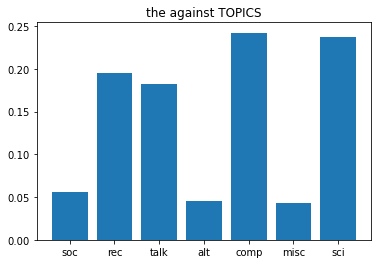

In [39]:
plt.title(f"{word} against TOPICS")
plt.bar(topic_word_distr.loc[word].index, topic_word_distr.loc[word])
plt.show()

### Evaluate Topic model with Train set

In [40]:
score = 0
print("Evaluating Topic Model...")
for doc_index in tqdm(range(len(train_labels))):
    doc_vector = train_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr)
    score += int(doc_topic == label_classes[train_labels[doc_index]])
    
    if score:
        continue
    
#     print(clean_docs[len(train_labels)+doc_index])
#     print("{:8s} {:16s} {:6s}".format("topic", "word", "relation"))
#     print("="*40)
#     for label, word in doc_topic_word_distr.idxmax().items():
#         print("{:8s} {:16s} {:.4f}".format(label, word, doc_topic_word_distr[label][word]))

#     print(f"\nthe topic predicted is ==> '{np.max(doc_topic_word_distr).idxmax()}'")
#     print(f"the actual topic is ==> '{label_classes[labels[doc_index]]}'")

accuracy = score / (doc_index + 1)
print(f"==> train-accuracy is {accuracy*100:.2f}%\n")

Evaluating Topic Model...



==> train-accuracy is 89.85%



### Evaluating Topic Model with test set

In [41]:
score = 0
print("Evaluating Topic Model...")

misclasified = []
for doc_index in tqdm(range(len(test_labels))):
    doc_vector = test_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr)
    score += int(doc_topic == label_classes[test_labels[doc_index]])
    
    if doc_topic != label_classes[test_labels[doc_index]]:
        misclasified.append(doc_index)
    

accuracy = score / (doc_index + 1)
print(f"==> test-accuracy is {accuracy*100:.2f}%\n")

Evaluating Topic Model...



==> test-accuracy is 67.88%



### Using Logistic Regression to Learn Topic Model

In [42]:
logistic_regression_model = LogisticRegression(
    random_state=0, 
    fit_intercept=False,
#     multi_class="multinomial", 
#     solver="lbfgs"
)

In [43]:
logistic_regression_model.fit(train_doc_vectors, train_labels)

print(f"{len(train_labels)} training sample(s), {len(test_labels)} test sample(s)")

2010 training sample(s), 990 test sample(s)


In [44]:
train_accuracy = logistic_regression_model.score(train_doc_vectors, train_labels)
test_accuracy = logistic_regression_model.score(test_doc_vectors, test_labels)

print(f"training_accuarcy = {train_accuracy*100:.2f}%, test_accuarcy = {test_accuracy*100:.2f}%")

training_accuarcy = 91.04%, test_accuarcy = 70.61%


In [45]:
label_class = 'comp'
np.array(vocabulary)[logistic_regression_model.coef_[label_classes.index(label_class)].argsort()][::-1]

array(['windows', 'mac', 'use', ..., 'people', 'they', 'he'], dtype='<U79')

In [46]:
word="keyboard"
relation = pd.DataFrame(data=logistic_regression_model.coef_[:, vocabulary.index(word)].reshape((1,7)), columns=label_classes).T[0]
relation.sort_values(ascending=False)

comp    1.042786
misc    0.031577
alt    -0.088690
soc    -0.103107
talk   -0.190459
rec    -0.329777
sci    -0.362329
Name: 0, dtype: float64

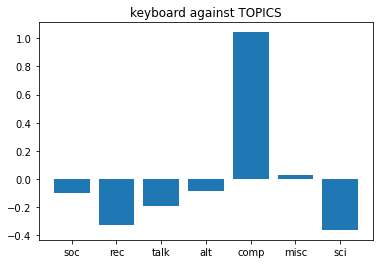

In [47]:
plt.title(f"{word} against TOPICS")
plt.bar(relation.index, relation)
plt.show()

In [216]:
#find if Union of misclassified sets complement

In [221]:
lr_misclasified = np.where(logistic_regression_model.predict(test_doc_vectors) != test_labels)[0]

len(np.intersect1d(lr_misclasified, misclasified)), len(misclasified), len(lr_misclasified)

(83, 137, 108)

### learn best weight for each word for every topic

In [278]:
augmenting_logistic_regression_model = LogisticRegression(
    random_state=0, 
    fit_intercept=False,
    warm_start=True,
#     multi_class="multinomial", 
#     solver="lbfgs"
)

for word_index in tqdm(range(len(vocabulary))):
    word = vocabulary[word_index]
    X = train_doc_vectors[:, word_index:word_index+1]
    augmenting_logistic_regression_model.fit(X, train_labels)
    
print(f"lr_topic_word_distr shape {lr_topic_word_distr.shape}")

0.2656716417910448
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26268

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2701492537313433
0.2626865671641791
0.2626865671641791
0.26417910447761195
0

0.2656716417910448
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2641

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2701492537313433
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.2701492537313433
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26119402985074625
0.2626865671641791
0.2746268656716418
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.27313432835820894
0.26417910447761195
0.2656716417910448
0.26865671641791045
0.2656716417910448
0.26865671641791045
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26119402985074625
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.26

0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2671641791044776
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2701492537313433
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.27611940298507465
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.

0.2656716417910448
0.26865671641791045
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.2656716417910448
0.2656716417910448
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2641791044

0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.2701492537313433
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2641791044

0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.28955223880597014
0.26417910447761195
0.26417910447761195
0.2

0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26865671641791045
0.27313432835820894
0.26417910447761195
0.2716417910447761
0.26417910447761195
0.28059701492537314
0.2656716417910448
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.2701492537313433
0.26417910447761195
0.

0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2656716417910448
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0

0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.27313432835820894
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26865671641791045
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.26119402985074625
0.2671641791044776
0.2656716417910448
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.264

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641

0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2

0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2746268656716418
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26119402985074625
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2671641791044776
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2716417910447761
0.2626865671641791
0.2656716417910448
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2791044776119403
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2716417910447761
0.2626865671641791
0.26417910447761195
0.26

0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2656716417910448
0.2626

0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26865671641791045
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.27313432835820894
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26119402985074625
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26

0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.30597014925373134
0.2746268656716418
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2716417910447761
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.26865671641791045
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.2656716417910448
0.26417910447761195
0.26716

0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2701492537313433
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.28059701492537314
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.25970

0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26865671641791045
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.

0.2656716417910448
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.262686

0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2716417910447761
0.2701492537313433
0.2671641791044776
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26865671641791045
0.27313432835820894
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26865671641791045
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26865671641791045
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.27611940298507465
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.27313432835820894
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.264

0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.282089552238806
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26567164179104

0.2626865671641791
0.26417910447761195
0.27611940298507465
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2582089552238806
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.

0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.26119402985074625
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.27313432835820894
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2641791044

0.2626865671641791
0.26865671641791045
0.2716417910447761
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.2701492537313433
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2656716417910448
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.26865671641791045
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2746268656716418
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26865671641791045
0.2626865671641791
0.2656716417910448
0.26417910

0.2716417910447761
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2701492537313433
0.26417910447761195
0.2746268656716418
0.26417910447761195
0.2671641791044776
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.264179104477611

0.26417910447761195
0.26865671641791045
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2671641791044776
0.2701492537313433
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26865671641791045
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2716417910447761
0

0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.25970149253731345
0.27761194029850744
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0

0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.

0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.27313

0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2880597014925373
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.264

0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.2656716417910448
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417

0.2626865671641791
0.2656716417910448
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26865671641791045
0.2626865671641791
0.2671641791044776
0.27313432835820894
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.2716417910447761
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.26119402985074625
0.2716417910447761
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2716417910447761
0.27611940298507465
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.265671641791

0.28059701492537314
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26865671641791045
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2716417910447761
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26

0.2626865671641791
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2791044776119403
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2671641791044776
0.2656716417910448
0.2701492537313433
0.26417910447761195
0.2626865671641791
0.2746268656716418
0.2626865671641791
0.27313432835820894
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.2641791044

0.2626865671641791
0.2656716417910448
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.2671641791044776
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2701492537313433
0.2626865671641791
0.26417910447761195
0.26865671641791045
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2656716417910448
0.26417910447761195
0.265671641791

0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.28059701492537314
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.25970149253731345
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.

0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.26865671641791045
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2641

0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26417910447761195
0.2656716417910448
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2626865671641791
0.2626865671641791
0.2656716417910448
0.26417910447761195
0.2626865671641791
0.2656716417910448
0.2656716417910448
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.2671641791044776
0.2626865671641791
0.2626865671641791
0.26417910447761195
0.26417910447761195
0.2626865671641791
0.26567164179

In [251]:
lr_topic_word_distr.head()

,comp,talk,alt,rec,sci,soc,misc
00,-0.050807,0.110697,-0.065785,-0.061560,-0.020296,0.000011,0.087740
000,-0.091240,-0.048190,-0.104672,0.173658,0.028575,-0.104672,0.146541
0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00000000,-0.120186,-0.120186,-0.120186,-0.120186,0.721117,-0.120186,-0.120186
00000000b,-0.120186,-0.120186,-0.120186,-0.120186,0.721117,-0.120186,-0.120186


In [252]:
label_classes

['comp', 'talk', 'alt', 'rec', 'sci', 'soc', 'misc']

In [253]:
label_class = 'comp'
lr_topic_word_distr[label_class][lr_topic_word_distr[label_class] > 0].sort_values(ascending=False)

monitors    0.822285
lc          0.817749
ati         0.816019
cursor      0.808457
dma         0.808341
              ...   
contrary    0.001526
left        0.001509
gets        0.001249
strong      0.001117
major       0.001025
Name: comp, Length: 3729, dtype: float64

In [256]:
word = "application"
lr_topic_word_distr.loc[word].sort_values(ascending=False)

comp    0.415257
sci     0.025963
misc   -0.088244
soc    -0.088244
rec    -0.088244
alt    -0.088244
talk   -0.088244
Name: application, dtype: float64

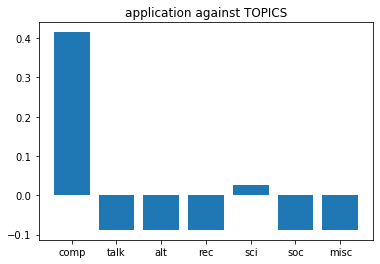

In [257]:
plt.title(f"{word} against TOPICS")
plt.bar(lr_topic_word_distr.loc[word].index, lr_topic_word_distr.loc[word])
plt.show()

### Evaluate Topic model with Train set

In [258]:
score = 0
print("Evaluating Topic Model...")
for doc_index in tqdm(range(len(train_labels))):
    doc_vector = train_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, lr_topic_word_distr)
    score += int(doc_topic == label_classes[train_labels[doc_index]])
    
    if score:
        continue
    
#     print(clean_docs[len(train_labels)+doc_index])
#     print("{:8s} {:16s} {:6s}".format("topic", "word", "relation"))
#     print("="*40)
#     for label, word in doc_topic_word_distr.idxmax().items():
#         print("{:8s} {:16s} {:.4f}".format(label, word, doc_topic_word_distr[label][word]))

#     print(f"\nthe topic predicted is ==> '{np.max(doc_topic_word_distr).idxmax()}'")
#     print(f"the actual topic is ==> '{label_classes[labels[doc_index]]}'")

accuracy = score / (doc_index + 1)
print(f"==> train-accuracy is {accuracy*100:.2f}%\n")

Evaluating Topic Model...



==> train-accuracy is 96.87%



### Evaluating Topic Model with test set

In [259]:
score = 0
print("Evaluating Topic Model...")

misclasified = []
for doc_index in tqdm(range(len(test_labels))):
    doc_vector = test_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, lr_topic_word_distr)
    score += int(doc_topic == label_classes[test_labels[doc_index]])
    
    if doc_topic != label_classes[test_labels[doc_index]]:
        misclasified.append(doc_index)
    

accuracy = score / (doc_index + 1)
print(f"==> test-accuracy is {accuracy*100:.2f}%\n")

Evaluating Topic Model...



==> test-accuracy is 55.45%



In [274]:
logistic_regression_model.coef_ = lr_topic_word_distr.values.reshape((len(label_classes), len(vocabulary)))

In [355]:
(89.70+70.20)/2

79.95